<a href="https://colab.research.google.com/github/risker93/Hello_World/blob/main/2021_06_10_%EC%88%98%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
from statsmodels import datasets
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
raw_set = datasets.get_rdataset("co2", package='datasets')
type(raw_set)


statsmodels.datasets.utils.Dataset

In [72]:
raw = raw_set.data
raw.head()

,time,value
0,1959.000000,315.42
1,1959.083333,316.31
2,1959.166667,316.50
3,1959.250000,317.56
4,1959.333333,318.13


In [73]:
raw.tail()

,time,value
463,1997.583333,362.57
464,1997.666667,360.24
465,1997.750000,360.83
466,1997.833333,362.49
467,1997.916667,364.34


기본적으로 데이터를 받았으니 쳐야될것들을 쳐보자

Y를 정규화 한다는 말은 화이트 노이즈 라는 말

자기 상관이 없는 시계열을 백색잡음 이라고 합니다.

상관값이 두 변수 사이의 선형 관계의 크기를 측정하는 것처럼, 

자기상관(autocorrelation)은 시계열의 시차 값(lagged values) 사이의 선형 관계를 측정합니다

시계열 데이터가 있을때 다음 예측 범위는 아주 크다 

넓은 범위가 아닌 좁은 범위로 예측할수 있도록 변동을 줄여보고 예측 후

예측한 값을 기준으로 계산해본다. 

독립변수인 x를 다루는 것이 아닌 y를 다루고 있다는 점을 이해하자.

우리가 할 것은 추세를 없애고, 계절성을 없애서, 정상성을 가지게 만들것이다.

**정상성**

시계열의 변동이 시간의 흐름에 따라 일정하다. 시간이 지나도 분산이 일정하다.

즉, 정상성의 의미는 시계열의 확률적인 성질들이 시간의 흐름에 따라 변하지 않는다는 것을 의미한다. 

평균과 분산 등 체계적인 변화가 없고 주기적인 변화가 없는 것을 의미한다.



    추세(trend)
    데이터가 장기적으로 증가하거나 감소할 때, 추세(trend)가 존재합니다. 추세가 
    선형적일 필요는 없습니다. 때때로 어떤 추세가 증가에서 감소로 변화하는 
    경우에, 그것을 추세의 “방향이 변화했다”라고 언급할 것입니다.

    계절성(seasonality)
    해마다 어떤 특정한 때나 1주일마다 특정 요일에 나타나는 것 같은 계절성 
    요인이 시계열에 영향을 줄 때 계절성(seasonality) 패턴이 나타납니다. 
    계절성은 빈도의 형태로 나타나는데, 그 빈도는 항상 일정하며 알려져 
    있습니다. 

    주기성(cycle)
    고정된 빈도가 아닌 형태로 증가나 감소하는 모습을 보일 때 주기(cycle)가 
    나타납니다. 보통 이러한 요동은 경제 상황 때문에 일어나고, 흔히 “경기 순환
    (business cycle)”과 관련 있습니다. 보통 이러한 요동의 지속기간은 적어도 
    2년 이상입니다.


많은 이들이 주기적인 패턴과 계절적인 패턴을 혼동하지만, 사실 둘은 정말 다릅니다. 

일정한 빈도로 나타나지 않는 요동은 주기적입니다. 

빈도가 변하지 않고 연중 어떤 시기와 연관되어 있다면 그 요동은 계절성입니다. 

일반적으로, 주기들의 평균 길이는 계절성 패턴의 길이보다 길고, 주기의 크기는 계절적인 패턴의 크기보다 좀 더 변동성이 큰 경향이 있습니다.

In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    468 non-null    float64
 1   value   468 non-null    float64
dtypes: float64(2)
memory usage: 7.4 KB


In [4]:
raw.head()

,time,value
0,1959.000000,315.42
1,1959.083333,316.31
2,1959.166667,316.50
3,1959.250000,317.56
4,1959.333333,318.13


In [5]:
raw.describe()

,time,value
count,468.000000,468.000000
mean,1978.458333,337.053526
std,11.270352,14.966220
min,1959.000000,313.180000
25%,1968.729167,323.530000
50%,1978.458333,335.170000
75%,1988.187500,350.255000
max,1997.916667,366.840000


<BarContainer object of 468 artists>

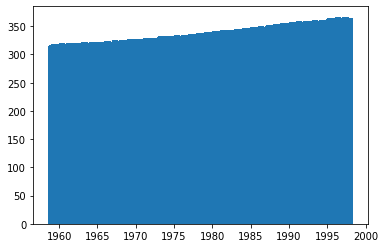

In [6]:
#어떻게 생겼는지 보도록 하자

plt.bar(raw.time, raw.value)

이쁘지가 않다 다른걸로 보자

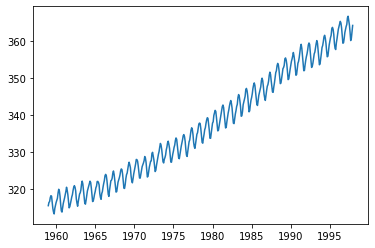

In [7]:
plt.plot(raw.time, raw.value)

실제 데이터에서는 볼수 없는 모양

추세가 증가하고 있구나

반복되는 계절성이 있구나

In [10]:
result = sm.OLS.from_formula(formula='value~time', data=raw).fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 1.479e+04
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:22:56   Log-Likelihood:                -1113.5
No. Observations:                 468   AIC:                             2231.
Df Residuals:                     466   BIC:                             2239.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2249.7742     21.268   -105.784      0.000   -2291.566   -2207.982
time           1.3075      0.011    121.634      0.000       1.286       1.329
==============================================================================
Omnibus:                       15.857   Durbin-Watson:                   0.212
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.798
Skew:                           0.048   Prob(JB):                       0.0203
Kurtosis:                       2.375   Cond. No.                     3.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

데이터 사이언스를 한다면 다 알아야 하는 사항들이다. 

y= ax+b 

시간에 x를 넣고 벨류값에 y를 넣어서

머신러닝의 가장 기본적인 모델중에 하나다.



In [11]:
result.params

Intercept   -2249.774198
time            1.307497
dtype: float64

우리는 이런것들을 코드로 다 이해하면 된다.

우리가 위 그래프를 직선으로(선형으로) 나오게 유도를 해볼 것이다.

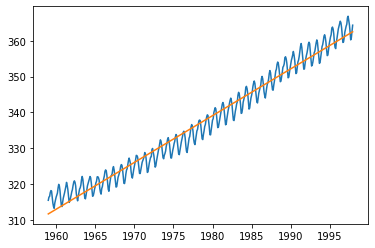

In [12]:
trend = result.params[0] + result.params[1] * raw.time
plt.plot(raw.time, raw.value, raw.time, trend)
plt.show()

머신러닝은 기본적으로 일차함수를 다룬다 생각하고,

딥러닝은 2차 함수 이상의 함수를 다룬다 생각하자.

보면 추세선이 있는데 추세를 제거해 보도록 하자.

In [17]:
result = sm.OLS.from_formula(formula='value~time+I(time**2)', data=raw).fit()
#y = c + ax+bx^2
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.075e+04
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:30:15   Log-Likelihood:                -1027.8
No. Observations:                 468   AIC:                             2062.
Df Residuals:                     465   BIC:                             2074.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      4.77e+04   3482.902     13.696      0.000    4.09e+04    5.45e+04
time           -49.1907      3.521    -13.971      0.000     -56.110     -42.272
I(time ** 2)     0.0128      0.001     14.342      0.000       0.011       0.015
==============================================================================
Omnibus:                       66.659   Durbin-Watson:                   0.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.850
Skew:                          -0.116   Prob(JB):                     0.000133
Kurtosis:                       2.072   Cond. No.                     1.35e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared 수치가 이렇게 높게 나오는게 현실 세계의 데이터라면 뭔가 문제가 있을 확률이 있다.

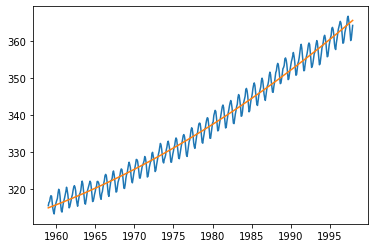

In [19]:
trend = result.params[0] + result.params[1]*raw.time + result.params[2]*raw.time**2
plt.plot(raw.time, raw.value, raw.time, trend)
plt.show()

아래 값들은 각각의 잔차값들

In [20]:
result.resid

0      0.593718
1      1.416059
2      1.538223
3      2.530210
4      3.032020
         ...   
463   -2.539729
464   -5.019454
465   -4.579357
466   -3.069437
467   -1.369695
Length: 468, dtype: float64

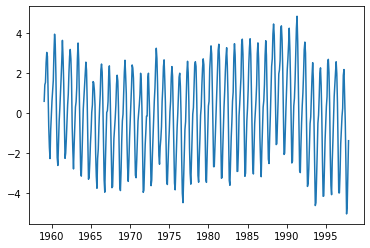

In [22]:
plt.plot(raw.time, result.resid)

추세를 제거해 -4에서 4까지로 만들었다.

y값이 어떻게 정상성인가? 

In [25]:
# adf, kpss
def stationarity_adf_test(Y_Data, Target_name):
    if len(Target_name) == 0:
        Stationarity_adf = pd.Series(sm.tsa.stattools.adfuller(Y_Data)[0:4],
                                     index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
        for key, value in sm.tsa.stattools.adfuller(Y_Data)[4].items():
            Stationarity_adf['Critical Value(%s)'%key] = value
            Stationarity_adf['Maximum Information Criteria'] = sm.tsa.stattools.adfuller(Y_Data)[5]
            Stationarity_adf = pd.DataFrame(Stationarity_adf, columns=['Stationarity_adf'])
    else:
        Stationarity_adf = pd.Series(sm.tsa.stattools.adfuller(Y_Data[Target_name])[0:4],
                                     index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
        for key, value in sm.tsa.stattools.adfuller(Y_Data[Target_name])[4].items():
            Stationarity_adf['Critical Value(%s)'%key] = value
            Stationarity_adf['Maximum Information Criteria'] = sm.tsa.stattools.adfuller(Y_Data[Target_name])[5]
            Stationarity_adf = pd.DataFrame(Stationarity_adf, columns=['Stationarity_adf'])
    return Stationarity_adf

def stationarity_kpss_test(Y_Data, Target_name):
    if len(Target_name) == 0:
        Stationarity_kpss = pd.Series(sm.tsa.stattools.kpss(Y_Data)[0:3],
                                      index=['Test Statistics', 'p-value', 'Used Lag'])
        for key, value in sm.tsa.stattools.kpss(Y_Data)[3].items():
            Stationarity_kpss['Critical Value(%s)'%key] = value
            Stationarity_kpss = pd.DataFrame(Stationarity_kpss, columns=['Stationarity_kpss'])
    else:
        Stationarity_kpss = pd.Series(sm.tsa.stattools.kpss(Y_Data[Target_name])[0:3],
                                      index=['Test Statistics', 'p-value', 'Used Lag'])
        for key, value in sm.tsa.stattools.kpss(Y_Data[Target_name])[3].items():
            Stationarity_kpss['Critical Value(%s)'%key] = value
            Stationarity_kpss = pd.DataFrame(Stationarity_kpss, columns=['Stationarity_kpss'])
    return Stationarity_kpss


이런 코드들을 자주 찾아보면 좋다.

그럴때 가장 중요한 것은 좋은 코드가 있다면 

나만의 궁전에 넣어두도록 하자.

이런 모듈화된, 것들을 잘 활용할수록 좋다.

adf, kpss를 계속 사용해보면서 확인 해보는것이 좋다.

adf, kpss: 정상성 확인하는 테스트 방법이다.

ADF: 추세만 확인한다. 

KPSS: 계절성만 확인한다.

ADF검증조건: p-value < 0.05 (추세가 제거 되었다.)

KPSS검증조건: p-value > 0.05 (계절성이 제거 되었다.) 



In [28]:
stationarity_adf_test(result.resid, [])

#잔차를 넣으면 이런식으로 나오게 된다. 
#깊게 공부 할때는 이런 것들을 하나하나 확인 해보아야 한다.

,Stationarity_adf
Test Statistics,-2.527950
p-value,0.108821
Used Lag,13.000000
Used Observations,454.000000
Critical Value(1%),-3.444836
Maximum Information Criteria,260.098601


p-value를 보면 0.05보다 작지 않다, 추세가 어느정도 있는것 같구나.

In [29]:
stationarity_kpss_test(result.resid, [])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


,Stationarity_kpss
Test Statistics,0.171318
p-value,0.100000
Used Lag,18.000000
Critical Value(10%),0.347000


<function matplotlib.pyplot.show>

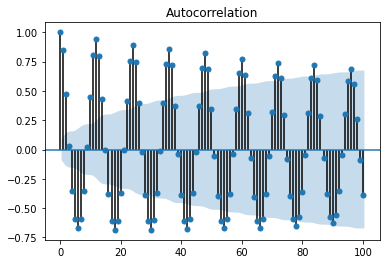

In [30]:
'''
ACF
'''

sm.graphics.tsa.plot_acf(result.resid, lags=100)
plt.show

자기상관(autocorrelation) 에 대해서 확인해 본다.


In [31]:
#추세 제거를 다른방식으로 한번 진행해 보자.

In [32]:
raw.value

0      315.42
1      316.31
2      316.50
3      317.56
4      318.13
        ...  
463    362.57
464    360.24
465    360.83
466    362.49
467    364.34
Name: value, Length: 468, dtype: float64

In [33]:
raw.value.shift(1)

0         NaN
1      315.42
2      316.31
3      316.50
4      317.56
        ...  
463    364.52
464    362.57
465    360.24
466    360.83
467    362.49
Name: value, Length: 468, dtype: float64

shift를 사용하면 한칸씩 내려가고 맨 아래에서 내려간 값은 사라지고 맨 윗값은 난이된다.

비트코인이나 주식에서 많이 쓰이는건데 

차이를 분석 한 것이기 때문에 모든 각 각 의 차이를 다 더해주면 실제 값이 된다.

In [34]:
#data = raw.value.shift(1)
raw.value.diff(1)

0       NaN
1      0.89
2      0.19
3      1.06
4      0.57
       ... 
463   -1.95
464   -2.33
465    0.59
466    1.66
467    1.85
Name: value, Length: 468, dtype: float64

이러한 값들로 상관성을 파악한 것이 acf 그림이다.

차이점을 비교해서 정상성을 만드는 방식

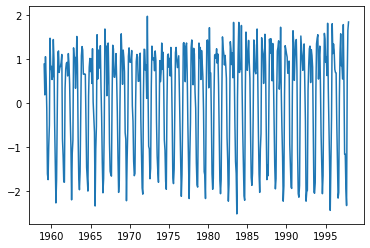

In [37]:
plt.plot(raw.time[1:], raw.value.diff(1).dropna())
plt.show()

이 결과값과 위에 있던 결과값을 비교할때 아래의 그림이 더 좋다.

하루전, 이틀전, 삼일전의 값을 넣어야 하나요?

다 해보고 가장 정상성이 높은 것을 선택 해야한다.

,Stationarity_adf
Test Statistics,-5.138087
p-value,0.000012
Used Lag,12.000000
Used Observations,454.000000
Critical Value(1%),-3.444836
Maximum Information Criteria,271.870851


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


,Stationarity_kpss
Test Statistics,0.040406
p-value,0.100000
Used Lag,18.000000
Critical Value(10%),0.347000


<function matplotlib.pyplot.show>

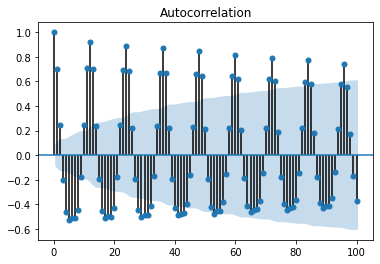

In [38]:
display(stationarity_adf_test(raw.value.diff(1).dropna(), []))
display(stationarity_kpss_test(raw.value.diff(1).dropna(), []))
sm.graphics.tsa.plot_acf(raw.value.diff(1).dropna(), lags=100)
plt.show

그래프로 그려보니 계절성이 있다. 

#**계절성 제거**

In [39]:
'''
시간, 호흡기 사망 데이터.

참고 블로그 : https://emilkwak.github.io/python-toy-datasets

rdatasets https://vincentarelbundock.github.io/Rdatasets/articles/data.html

'''
raw_set = datasets.get_rdataset("deaths", package="MASS")
raw = raw_set.data

In [40]:
raw.head()

,time,value
0,1974.000000,3035
1,1974.083333,2552
2,1974.166667,2704
3,1974.250000,2554
4,1974.333333,2014


In [41]:
raw.tail()

,time,value
67,1979.583333,1354
68,1979.666667,1333
69,1979.750000,1492
70,1979.833333,1781
71,1979.916667,1915


In [42]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    72 non-null     float64
 1   value   72 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.2 KB


In [43]:
raw.describe()

,time,value
count,72.000000,72.000000
mean,1976.958333,2056.625000
std,1.744037,609.845684
min,1974.000000,1300.000000
25%,1975.479167,1551.750000
50%,1976.958333,1870.000000
75%,1978.437500,2552.500000
max,1979.916667,3891.000000


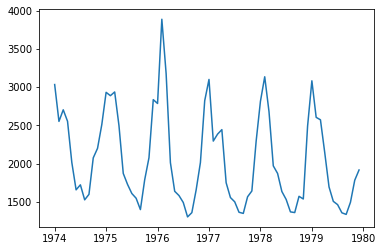

In [44]:
plt.plot(raw.time, raw.value)
plt.show()

계절성이 뚜렷하구나.

위에서 했던 것들을 가지고 오자

,Stationarity_adf
Test Statistics,-0.568650
p-value,0.877910
Used Lag,12.000000
Used Observations,59.000000
Critical Value(1%),-3.546395
Maximum Information Criteria,841.377559


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


,Stationarity_kpss
Test Statistics,0.651989
p-value,0.017910
Used Lag,12.000000
Critical Value(10%),0.347000


<function matplotlib.pyplot.show>

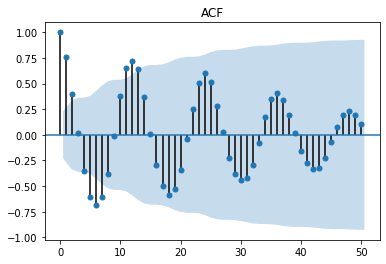

In [48]:
display(stationarity_adf_test(raw.value.dropna(), []))
display(stationarity_kpss_test(raw.value, []))
sm.graphics.tsa.plot_acf(raw.value,lags=50, title='ACF')
plt.show

Stationarity_adf 와 Stationarity_kpss 이 두개를 잘라 넣어 유용하게 사용하면 된다.

In [49]:
raw.head()

,time,value
0,1974.000000,3035
1,1974.083333,2552
2,1974.166667,2704
3,1974.250000,2554
4,1974.333333,2014


시간에 알수 없는 값들을 알수 있게 만들어보자

그냥 이런게 있다 하고 알고 넘어가자


In [56]:
pd.date_range('1974-01-01',periods=len(raw), freq='M')
raw['month'] = raw['time'].dt.month

실질적으로 코드를 다 쳐가면서 확인해 가면서 하면 된다.

In [55]:
#이게 뭐지
raw.time.dt.month[:20]
#아 이런거구나

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12     1
13     2
14     3
15     4
16     5
17     6
18     7
19     8
Name: time, dtype: int64

연도도 뽑을수 있다.

모르면 구글링을 하면 된다. 



In [57]:
raw.head()

,time,value,month
0,1974-01-31,3035,1
1,1974-02-28,2552,2
2,1974-03-31,2704,3
3,1974-04-30,2554,4
4,1974-05-31,2014,5


In [59]:
#'' 안에 value는 y이고 , c는 x의 자리이다.
#C() 변수 더미 값들로 1월 부터 12월까지 알아서 만들어 준다
#-1 은 0이 되면 좋지 않기때는에 y 절편을 반영하지 않겠다는 의미로 -1을 해준다. 라고한다...
result = sm.OLS.from_formula(formula='value ~ C(month) - 1', data=raw).fit()
display(result.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     31.66
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           6.55e-21
Time:                        01:35:31   Log-Likelihood:                -494.38
No. Observations:                  72   AIC:                             1013.
Df Residuals:                      60   BIC:                             1040.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[1]   2959.3333    103.831     28.502      0.000    2751.641    3167.025
C(month)[2]   2894.6667    103.831     27.879      0.000    2686.975    3102.359
C(month)[3]   2743.0000    103.831     26.418      0.000    2535.308    2950.692
C(month)[4]   2269.6667    103.831     21.859      0.000    2061.975    2477.359
C(month)[5]   1805.1667    103.831     17.386      0.000    1597.475    2012.859
C(month)[6]   1608.6667    103.831     15.493      0.000    1400.975    1816.359
C(month)[7]   1550.8333    103.831     14.936      0.000    1343.141    1758.525
C(month)[8]   1408.3333    103.831     13.564      0.000    1200.641    1616.025
C(month)[9]   1397.3333    103.831     13.458      0.000    1189.641    1605.025
C(month)[10]  1690.0000    103.831     16.277      0.000    1482.308    1897.692
C(month)[11]  1874.0000    103.831     18.049      0.000    1666.308    2081.692
C(month)[12]  2478.5000    103.831     23.871      0.000    2270.808    2686.192
==============================================================================
Omnibus:                       19.630   Durbin-Watson:                   1.374
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.630
Skew:                           0.787   Prob(JB):                     1.67e-11
Kurtosis:                       6.750   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

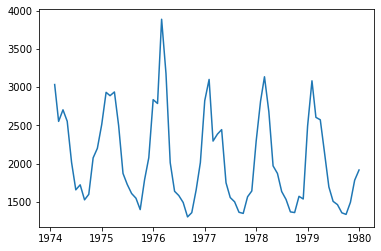

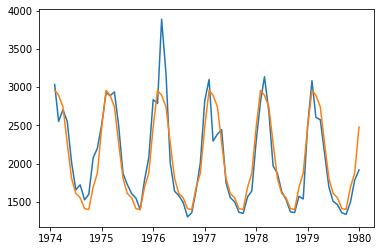

In [61]:
#만든것으로 정확도가 얼마나 나오나 확인을 해보자

plt.plot(raw.time, raw.value)
plt.show() 

#여기에 우리가 만든 값들을 보고싶으면 x, y를 넣어주면 된다.

plt.plot(raw.time, raw.value, raw.time, result.fittedvalues)
plt.show()


주기와 계절성은 다른 의미로 쓰인다. 궁굼하면 검색해보아라


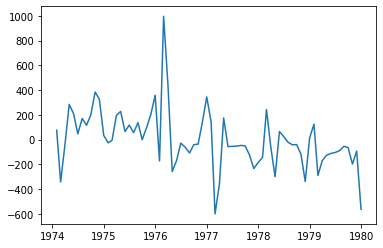

In [62]:
'''
result.resid : 잔차
'''

plt.plot(raw.time, result.resid)
plt.show()

썩 마음에 들지 않으나 계절성 자체는 사라진것을 볼 수 있다.

,Stationarity_adf
Test Statistics,-5.842931e+00
p-value,3.740637e-07
Used Lag,0.000000e+00
Used Observations,7.100000e+01
Critical Value(1%),-3.526005e+00
Maximum Information Criteria,8.123641e+02


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


,Stationarity_kpss
Test Statistics,0.538249
p-value,0.033052
Used Lag,12.000000
Critical Value(10%),0.347000


<function matplotlib.pyplot.show>

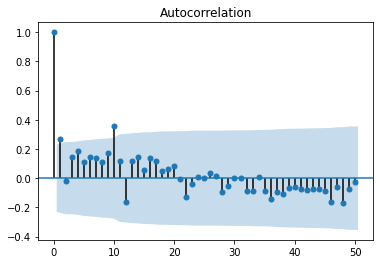

In [64]:
display(stationarity_adf_test(result.resid, []))
display(stationarity_kpss_test(result.resid, []))
sm.graphics.tsa.plot_acf(result.resid,lags=50)
plt.show

셋 다 정상이 나오면 좋겠다만, 아니라면 이유를 가지고 선택을 하면 된다.

kpss에서 계절성이 있다고 나오는데 그림을 보니 계절성이 있지 않다.

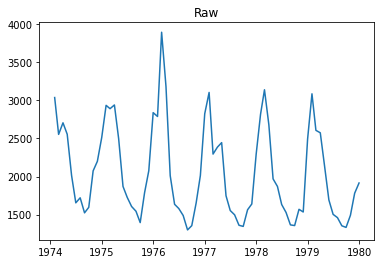

In [65]:
plt.plot(raw.time, raw.value)
plt.title('Raw')
plt.show()


f 스트링


In [68]:
a = '영우'
b = '글로벌'
print(f'{a}는바보 {b} 바보')

영우는바보 글로벌 바보


와 이런거구나 

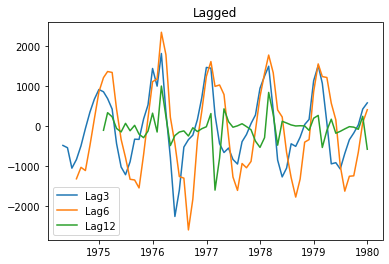

In [66]:
'''
for seasonal_lag in [3, 6, 12]:
  plt.plot(raw.time[seasonal_lag:], raw.value.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
  이런 식으로 자동화를 할수도 있다.
'''

seasonal_lag = 3
plt.plot(raw.time[seasonal_lag:], raw.value.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
seasonal_lag = 6
plt.plot(raw.time[seasonal_lag:], raw.value.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
seasonal_lag = 12
plt.plot(raw.time[seasonal_lag:], raw.value.diff(seasonal_lag).dropna(), label='Lag{}'.format(seasonal_lag))
plt.title('Lagged')
plt.legend()
plt.show()

이런 것들이 좋은 코드이다. 저장 해 두고 잘 사용하도록 하자.

3개월 6개월 12개월 전 값들을 넣어서 같이 표시하자 라는 코드

3, 6 보다는 12가 더 좋은것 같구나.

In [69]:
'''
raw, diff, ... 이런것들을 다 이용해

OLS(y=ax + b 모델) 여러 모델들을 사용해서

ADF, KPSS, ACF를 사용해서

Y값이 정상성인지 아닌지를 확인할수 있게 되었다.
'''

'\nraw, diff, ... 이런것들을 다 이용해\n\nOLS(y=ax + b 모델) 여러 모델들을 사용해서\n\nADF, KPSS, ACF를 사용해서\n\nY값이 정상성인지 아닌지를 확인할수 있게 되었다.\n'